# MALIGNANT COMMENTS CLASSIFICATION

### Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    


##### The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   

In [1]:
#Import data processing library
import pandas as pd
#Import LinearAlgebra
import numpy as np
#Import visiulization library
import matplotlib.pyplot as plt
import seaborn as sns
#Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading train dataset
df_train=pd.read_csv(r"F:\Fliprobo\Malignant_comments_train.csv")

In [3]:
df_train

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [4]:
#Loading test dataset
df_test=pd.read_csv("Malignant_comments.csv")

In [5]:
df_test

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [6]:
#Checking the shape of train and test
print("The shape of train data is:",df_train.shape)
print("The shape of test dats is:",df_test.shape)

The shape of train data is: (159571, 8)
The shape of test dats is: (153164, 2)


In [8]:
#Checking the information of train and test data
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


### Observation:
                 1]In the both train test the id and comment text are object ,rest all are integer data type.

In [9]:
#checking the missing value in train and test
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
id              0
comment_text    0
dtype: int64


#### Observation:
    1]There is no null values in train and test dataset.

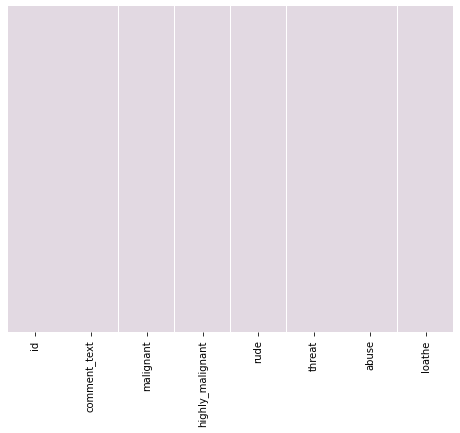

In [10]:
#Plotting the missing value through visiulization
plt.figure(figsize=(8,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="twilight_r")
plt.show()

##### Observation:
    1]As we can in visiulization there is no missing value in plot.

#### Observation:
                 So after ploting and checking we found that there is no missing value in dataset.

### Summary Statistic

In [10]:
df_train.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

#### Observation:
           1]There are six label columns according to the comment type .In upcoming we will transform all the six feature into single feature.

#### Exploring Data object

In [11]:
for column in df_train.columns:
    if df_train[column].dtype==object:
        print(str(column)+ ' :  ' +str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print("********************************************************************************")
        print("/n")

id :  ['0000997932d777bf' '000103f0d9cfb60f' '000113f07ec002fd' ...
 'ffee36eab5c267c9' 'fff125370e4aaaf3' 'fff46fc426af1f9a']
58ca19aba640fe5d    1
38b1f8e2e2ec8bd1    1
997d1881bef67964    1
97f092bfba933a0b    1
594c2b1d8247ddb9    1
                   ..
2d095c5713813071    1
50495459f0a8bee3    1
f660358e3c07d3cd    1
d10c5ed06eb06fe9    1
65736f11b5939cb9    1
Name: id, Length: 159571, dtype: int64
********************************************************************************
/n
comment_text :  ["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant infor

##### Correlation

In [12]:
#Checking the correlation of train dataset
df_train.corr()

malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000

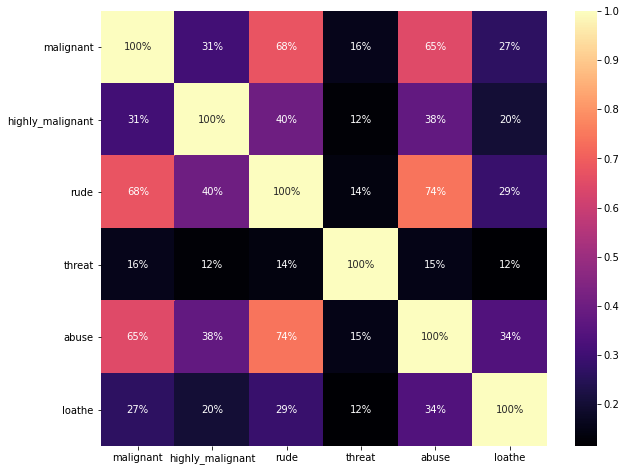

In [13]:
#Checking the correlation by visiulization
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True,fmt=".0%",cmap="magma")
plt.show()

<Figure size 1800x1080 with 0 Axes>

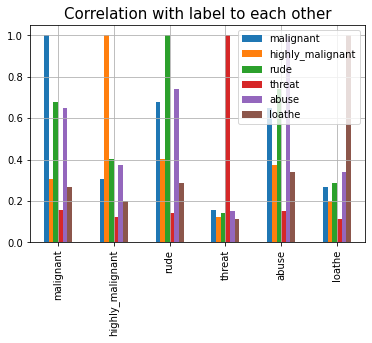

In [14]:
#Checking the correlation of labels in barplot
plt.figure(figsize=(25,15))
df_train.corr(method="kendall").plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with label to each other",fontsize=15)
plt.show()


In [15]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

### EDA

Showing the label count: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



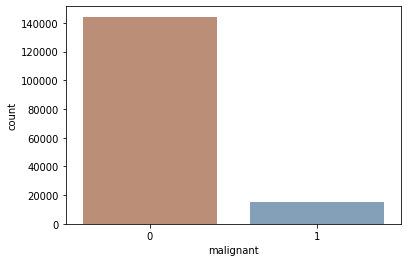

Showing the label count: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



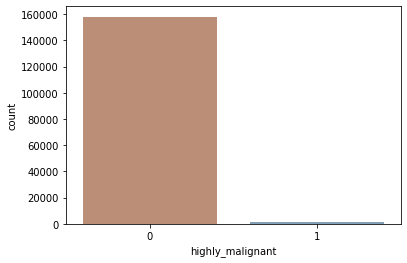

Showing the label count: rude
0    151122
1      8449
Name: rude, dtype: int64 



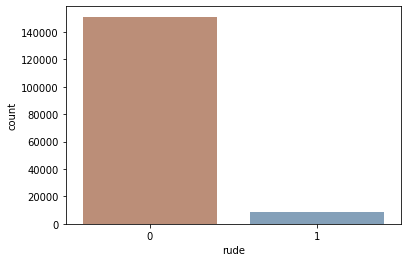

Showing the label count: threat
0    159093
1       478
Name: threat, dtype: int64 



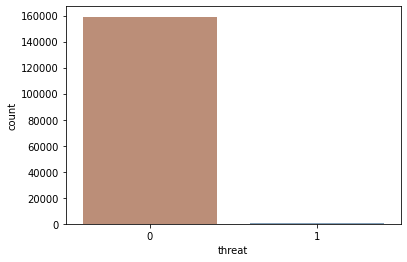

Showing the label count: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



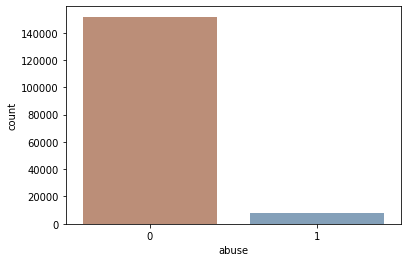

Showing the label count: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



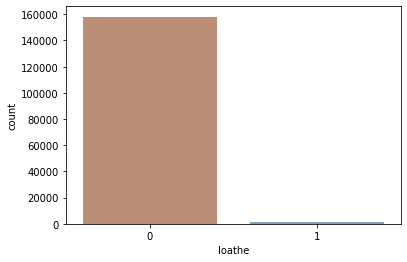

In [16]:
col=["malignant","highly_malignant","rude","threat","abuse","loathe"]
for i in col:
    print('Showing the label count:',i)
    sns.countplot(df_train[i],palette= 'twilight_shifted_r')
    print(df_train[i].value_counts(),'\n')
    plt.show()

### Observation:
            1]144277 is comments non malignant and 15294 comments is maglinant.
            2]157976 is non highly malignant and 1595 comments is highly malignant.
            3]151122 comments is not rude and 8449 comments is rude.
            4]159093 comments is not a threat and 478 comments is threat.
            5]151694 comments is not abuse and 7877 comments is abuse.
            6]158166 comments is loathe and 1405 comments is loathe.
            

##### Creating the new feature that combines the all target feature

In [7]:
target=["malignant","highly_malignant","rude","threat","abuse","loathe"]

In [8]:
df_train[target].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [9]:
target_score=df_train[target]
df_train["label"]=df_train[target].sum(axis=1)

In [10]:
df_train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  label  
0          0                 0     0       0      0       0      0  
1          0                 0     0       0      0       0      0  
2          0                 0     0       0      0       0      0  
3          0                 0     0       0      0       0      0  
4          0                 0     0       0      0       0      0

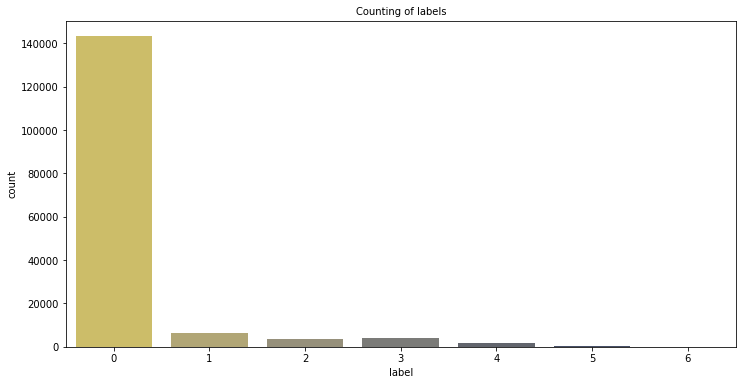

In [21]:
#Loading the counting of labels
plt.figure(figsize=(12,6))
sns.countplot(df_train["label"],palette="cividis_r")
plt.title("Counting of labels",fontsize=10)
plt.show()

#### scaling the target feature that is label

In [11]:
df_train["label"]=df_train["label"]>0
df_train["label"]=df_train["label"].astype(int)

In [16]:
df_train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  label  
0          0                 0     0       0      0       0      0  
1          0                 0     0       0      0       0      0  
2          0                 0     0       0      0       0      0  
3          0                 0     0       0      0       0      0  
4          0                 0     0       0      0       0      0

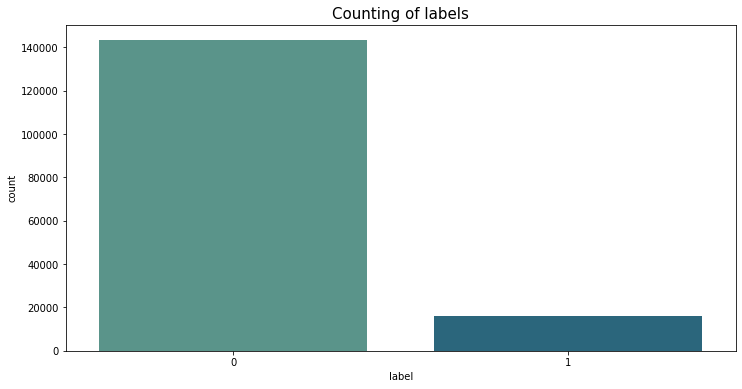

0    143346
1     16225
Name: label, dtype: int64

In [24]:
#checking the counting of labels
plt.figure(figsize=(12,6))
sns.countplot(df_train["label"],palette="crest")
plt.title("Counting of labels",fontsize=15)
plt.show()
df_train["label"].value_counts()

#### Proceding to perforing  the step of  Natural Processing Language

In [12]:
#Importing NLP libs
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import string
import re

In [18]:
#Creating the new columns before cleaning the comment_text columns
df_train["comment_length"]=df_train["comment_text"].str.len()
df_train.head(16)

id                                       comment_text  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
13  0006f16e4e9f292e  Before you start throwing accusations and warn...   
14  00070ef96486d6f9  Oh, and the girl above started her arguments w...   
15  00078f8ce7eb276d  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...   

    malignant  highly_malignant  rude  threat  abuse  loathe  label  \
0           0                 0     0       0      0       0      0   
1           0                 0     0       0      0       0      0   
2           0                 0     0       0      0       0      0   
3           0                 0     0       0      0       0      0   
4           0                 0     0       0      0       0      0   
5           0                 0     0       0      0       0      0   
6           1                 1     1       0      1       0      1   
7           0                 0     0       0      0       0      0   
8           0                 0     0       0      0       0      0   
9           0                 0     0       0      0       0      0   
10          0                 0     0       0      0       0      0   
11          0                 0     0       0      0       0      0   
12          1                 0     0       0      0       0      1   
13          0                 0     0       0      0       0      0   
14          0                 0     0       0      0       0      0   
15          0                 0     0       0      0       0      0   

    comment_length  
0              264  
1              112  
2              233  
3              622  
4               67  
5               65  
6               44  
7              115  
8              472  
9               70  
10            2875  
11              56  
12             319  
13             819  
14             219  
15             610

#### Data cleaning steps
            1]Remove stopwords
            2]Remove special Character
            3]Remove HTML TAGS
            4]Lemmatization
            5]Convert everything to lower case

In [13]:
#Remove email address with email
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                                             'emailaddress')
#Remove url with webaddress
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                                             'webaddress')
#Remove money symbol
df_train["comment_text"]=df_train["comment_text"].str.replace(r'£|\$','dollers')

#Remove 10digit phone number(format include paranthesis,space,nospace,dashes)with phone number
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{4}$',
                                                             'phonenumber')
#Remove number with number
df_train["comment_text"]=df_train["comment_text"].str.replace(r'\d+(\.\d+)?','number')

In [14]:
df_train.comment_text.head(10)

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
5    "\n\nCongratulations from me as well, use the ...
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism to the Matt Shirvington article...
8    Sorry if the word 'nonsense' was offensive to ...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [15]:
#Remove Punctuation
df_train["comment_text"]=df_train["comment_text"].str.replace(r'[^\w\d\s]','')
#Replace white space between terms with single space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'\s+',' ')
#Remove trailing and leading whitespace
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+|\s+?$',' ')

In [30]:
#Checking the train data 
df_train.comment_text.head(15)

0     Explanation Why the edits made under my userna...
1     Daww He matches this background colour Im seem...
2     Hey man Im really not trying to edit war Its j...
3      More I cant make any real suggestions on impr...
4     You sir are my hero Any chance you remember wh...
5      Congratulations from me as well use the tools...
6          COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7     Your vandalism to the Matt Shirvington article...
8     Sorry if the word nonsense was offensive to yo...
9     alignment on this subject and which are contra...
10     Fair use rationale for ImageWonjujpg Thanks f...
11    bbq be a man and lets discuss itmaybe over the...
12    Hey what is it talk What is it an exclusive gr...
13    Before you start throwing accusations and warn...
14    Oh and the girl above started her arguments wi...
Name: comment_text, dtype: object

In [16]:
#converting comment text into lower case
df_train["comment_text"]=df_train["comment_text"].str.lower()

In [17]:
stop_words=set(stopwords.words("english")+["u","O","ur","4","2","in","dont","doin","ure","yo","ye"])
df_train["comment_text"]=df_train["comment_text"].apply(lambda x:' '.join(
           term for term in x.split() if term not in stop_words))
df_train.comment_text.head(10)



0    explanation edits made username hardcore metal...
1    daww matches background colour im seemingly st...
2    hey man im really trying edit war guy constant...
3    cant make real suggestions improvement wondere...
4                  sir hero chance remember page thats
5             congratulations well use tools well talk
6                          cocksucker piss around work
7    vandalism matt shirvington article reverted pl...
8    sorry word nonsense offensive anyway im intend...
9                 alignment subject contrary dulithgow
Name: comment_text, dtype: object

##### Lemmatization

In [18]:
lem=WordNetLemmatizer()
df_train["comment_text"]=df_train["comment_text"].apply(lambda x: ' '.join(
                 lem.lemmatize(t)for t in x.split()))

In [24]:
#Creating new column clean text after removing punchuation,string,stopwords
df_train["clean_length"]=df_train.comment_text.str.len()
df_train.head(15)

id                                       comment_text  \
0   0000997932d777bf  explanation edits made username hardcore metal...   
1   000103f0d9cfb60f  daww match background colour im seemingly stuc...   
2   000113f07ec002fd  hey man im really trying edit war guy constant...   
3   0001b41b1c6bb37e  cant make real suggestion improvement wondered...   
4   0001d958c54c6e35                sir hero chance remember page thats   
5   00025465d4725e87             congratulation well use tool well talk   
6   0002bcb3da6cb337                        cocksucker piss around work   
7   00031b1e95af7921  vandalism matt shirvington article reverted pl...   
8   00037261f536c51d  sorry word nonsense offensive anyway im intend...   
9   00040093b2687caa               alignment subject contrary dulithgow   
10  0005300084f90edc  fair use rationale imagewonjujpg thanks upload...   
11  00054a5e18b50dd4                   bbq man let discus itmaybe phone   
12  0005c987bdfc9d4b  hey talk exclusive group wp talibanswho good d...   
13  0006f16e4e9f292e  start throwing accusation warning let review e...   
14  00070ef96486d6f9  oh girl started argument stuck nose doesnt bel...   

    malignant  highly_malignant  rude  threat  abuse  loathe  label  \
0           0                 0     0       0      0       0      0   
1           0                 0     0       0      0       0      0   
2           0                 0     0       0      0       0      0   
3           0                 0     0       0      0       0      0   
4           0                 0     0       0      0       0      0   
5           0                 0     0       0      0       0      0   
6           1                 1     1       0      1       0      1   
7           0                 0     0       0      0       0      0   
8           0                 0     0       0      0       0      0   
9           0                 0     0       0      0       0      0   
10          0                 0     0       0      0       0      0   
11          0                 0     0       0      0       0      0   
12          1                 0     0       0      0       0      1   
13          0                 0     0       0      0       0      0   
14          0                 0     0       0      0       0      0   

    comment_length  clean_length  
0              264           182  
1              112            98  
2              233           144  
3              622           370  
4               67            35  
5               65            38  
6               44            27  
7              115            57  
8              472           295  
9               70            36  
10            2875          1826  
11              56            32  
12             319           198  
13             819           508  
14             219           122

In [35]:
#Total removal length
print("Original Length:",df_train.comment_length.sum())
print("Cleaned Length:",df_train.clean_length.sum())
print("Removal Words Length:",(df_train.comment_length.sum()) - (df_train.clean_length.sum()))

Original Length: 62798247
Cleaned Length: 40508092
Removal Words Length: 22290155


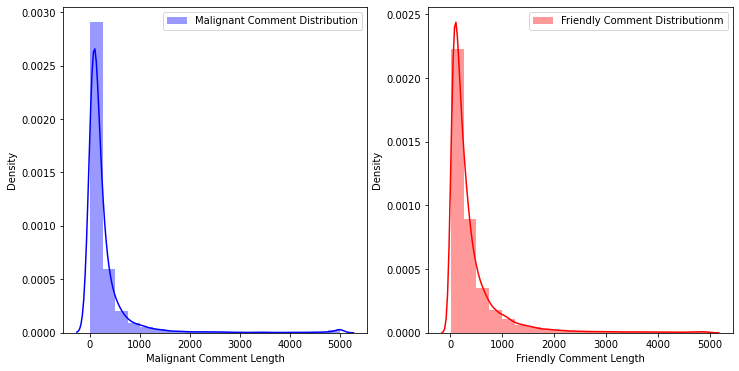

In [36]:
#Comment text distribution before cleaning
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df_train[df_train["label"]==1]["comment_length"],bins=20,ax=ax[0],label="Malignant Comment Distribution",color="b")
ax[0].set_xlabel("Malignant Comment Length")
ax[0].legend()

sns.distplot(df_train[df_train["label"]==0]["comment_length"],bins=20,ax=ax[1],label="Friendly Comment Distributionm",color="r")
ax[1].set_xlabel("Friendly Comment Length")
ax[1].legend()
plt.show()


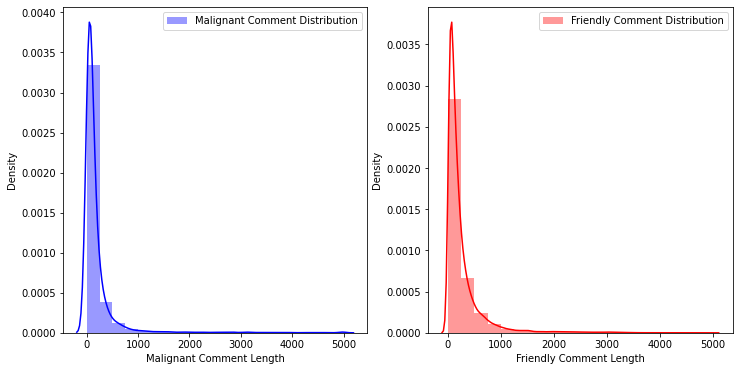

In [37]:
#comment text distribution after cleaning
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df_train[df_train["label"]==1]["clean_length"],bins=20,ax=ax[0],label="Malignant Comment Distribution",color="b")
ax[0].set_xlabel("Malignant Comment Length")
ax[0].legend()

sns.distplot(df_train[df_train["label"]==0]["clean_length"],bins=20,ax=ax[1],label="Friendly Comment Distribution",color="r")
ax[1].set_xlabel("Friendly Comment Length")
ax[1].legend()
plt.show()

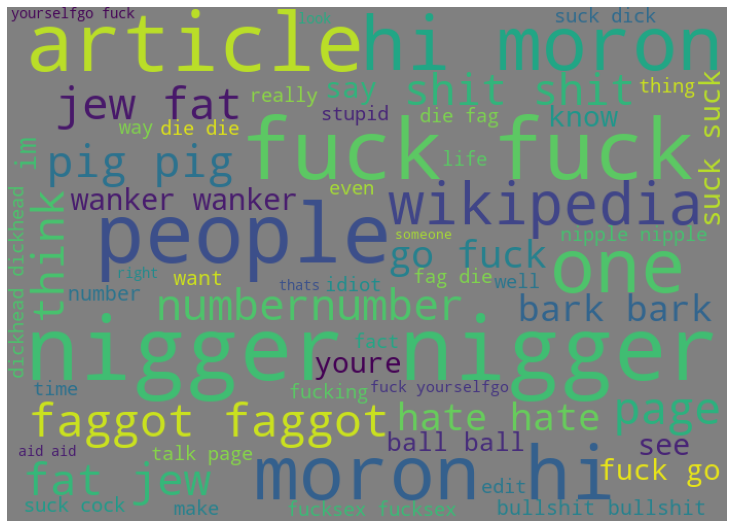

In [38]:
#Getting sense of loud words for malignant comments in label columns
from wordcloud import WordCloud

spams=df_train["comment_text"][df_train["label"]==1]
spams_cloud=WordCloud(width=700,height=500,background_color="grey",max_words=60).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor="w")
plt.imshow(spams_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

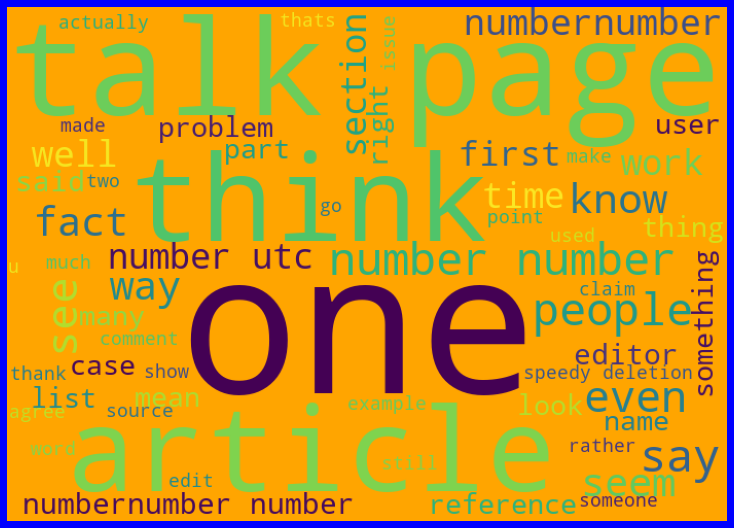

In [39]:
#Getting sense of loud words in friendly comment in label  columns
from wordcloud import WordCloud
spams=df_train["comment_text"][df_train["label"]==0]
spams_cloud=WordCloud(width=700,height=500,background_color="orange",max_words=60).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor="b")
plt.imshow(spams_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

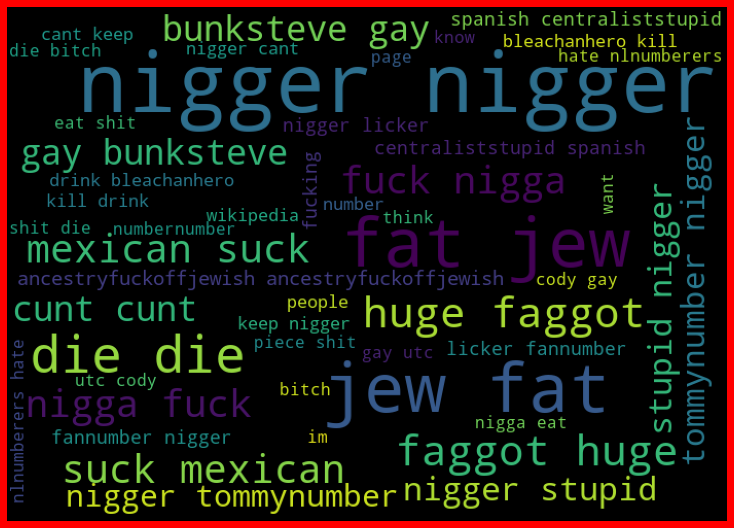

In [40]:
#Getting sense of loud word which are offensive for loathe labels
offensive=df_train["comment_text"][df_train["loathe"]==1]
offensive_cloud=WordCloud(width=700,height=500,background_color="black",max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor="r")
plt.imshow(offensive_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

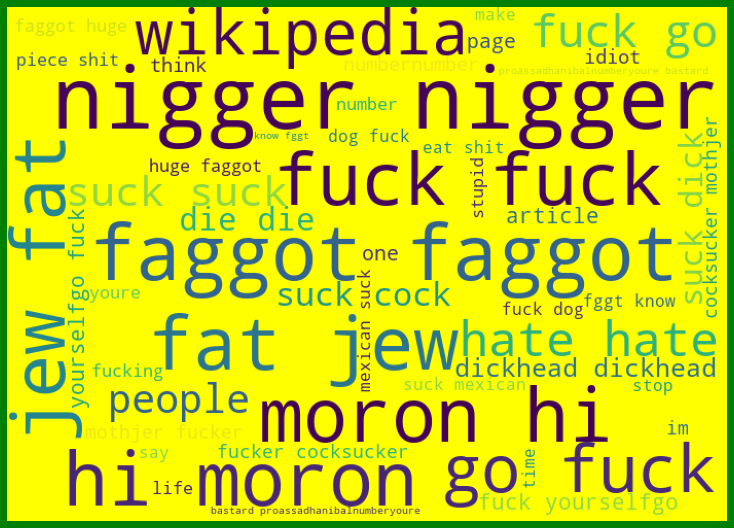

In [41]:
#Getting sense of loud which are offensive for abuse label
offensive =df_train["comment_text"][df_train["abuse"]==1]
offensive_cloud=WordCloud(width=700,height=500,background_color="yellow",max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor="g")
plt.imshow(offensive_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

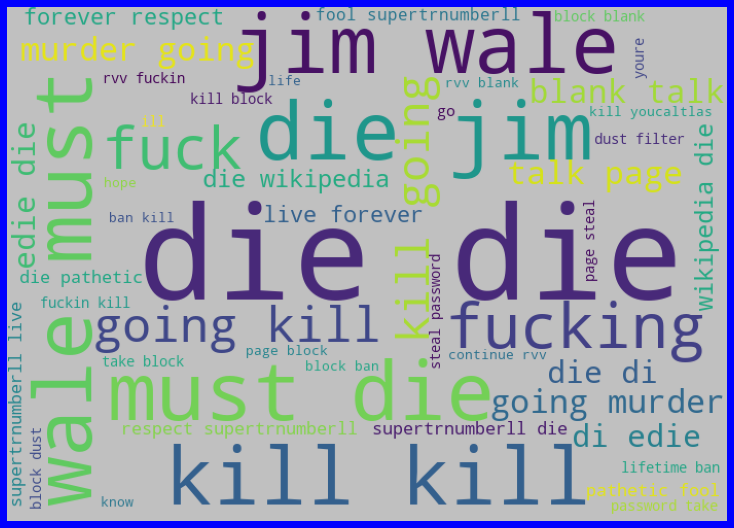

In [42]:
#Getting some of loud cloud which are offensive for threat label
offensive=df_train["comment_text"][df_train["threat"]==1]
offensive_cloud=WordCloud(width=700,height=500,background_color="silver",max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor="b")
plt.imshow(offensive_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

###### Converting the text into vector using Tf-idfVector

In [20]:
#Importing the tfidfvector library
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=13000,stop_words="english")

In [21]:
#Independent feature
X=tf.fit_transform(df_train["comment_text"])

In [22]:
X

<159571x13000 sparse matrix of type '<class 'numpy.float64'>'
	with 3368307 stored elements in Compressed Sparse Row format>

In [23]:
#Target variable
y=df_train["label"]

In [29]:
#Checking the distribution of label
print("Count of Malignant comment and Friendly:\n",df_train.label.value_counts())

Count of Malignant comment and Friendly:
 0    143346
1     16225
Name: label, dtype: int64


In [40]:
#Checking the distribution of label by percenatge
df_train["label"].value_counts(normalize=True)*100

0    89.832112
1    10.167888
Name: label, dtype: float64

##### Observation

###### After seeing the target variable that it shows that 89.83% of data is label 0 and only 10.16% of data is label 1 so our data set is imbalanced ,so before transforing into ML model we have get rid of imbalanced data.

#### Building Machine Learning Model

In [29]:
#Checking the shape of input and target variable
print(X.shape)
print(y.shape)

(159571, 13000)
(159571,)


In [24]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=56,test_size=.30,stratify=y)

In [31]:
#Checking the shape of x and y
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111699, 13000)
(47872, 13000)
(111699,)
(47872,)


In [32]:
#Importing model library
from sklearn.linear_model import LogisticRegression
#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [48]:
lg=LogisticRegression()
gridcv={"C":10*np.arange(-2,3),"penalty":["l1","l2"]}
cv=KFold(n_splits=20,random_state=None,shuffle=False)

In [49]:
clf=GridSearchCV(lg,gridcv,cv=cv,n_jobs=1,scoring="f1_macro")
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([-20, -10,   0,  10,  20]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [55]:
predclf_train=clf.predict(X_train)
print("Training Accuarcy is :",(accuracy_score(y_train,predclf_train)))
predclf_test=clf.predict(X_test)
print("Training Accuracy is :",(accuracy_score(y_test,predclf_test)))
print(confusion_matrix(y_test,predclf_test))
print(classification_report(y_test,predclf_test))

Training Accuarcy is : 0.9720051209052901
Training Accuracy is : 0.9596632687165776
[[42521   483]
 [ 1448  3420]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     43004
           1       0.88      0.70      0.78      4868

    accuracy                           0.96     47872
   macro avg       0.92      0.85      0.88     47872
weighted avg       0.96      0.96      0.96     47872



#### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predtc_train=dtc.predict(X_train)
print("Training accuracy is:",(accuracy_score(y_train,predtc_train)))
predtc_test=dtc.predict(X_test)
print("Testing accuracy is:",(accuracy_score(y_test,predtc_test)))
print(confusion_matrix(y_test,predtc_test))
print(classification_report(y_test,predtc_test))

Training accuracy is: 0.9988719684151156
Testing accuracy is: 0.9398186831550802
[[41607  1397]
 [ 1484  3384]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43004
           1       0.71      0.70      0.70      4868

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



#### RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
predrfc_train=rfc.predict(X_train)
print("Training Accuracy is :",(accuracy_score(y_train,predrfc_train)))
predrfc_test=rfc.predict(X_test)
print("Test Accuarcy is:",(accuracy_score(y_test,predrfc_test)))
print(confusion_matrix(y_test,predrfc_test))
print(classification_report(y_test,predrfc_test))


Training Accuracy is : 0.9988630157834896
Test Accuarcy is: 0.9563836898395722
[[42513   491]
 [ 1597  3271]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43004
           1       0.87      0.67      0.76      4868

    accuracy                           0.96     47872
   macro avg       0.92      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



#### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
predad=ad.predict(X_test)
print(confusion_matrix(y_test,predad))
print("Testing Accuracy is:",(accuracy_score(y_test,predad)))
print(classification_report(y_test,predad))

##### RandomForestClassifier gives the best score amoung all the algorithm so i m heading with randomforest,so i am not doing any hyperparameter due to my laptop getting automically shutdown bec of higher data.

In [25]:
#Plotting the graph by area under the curve
from sklearn.metrics import roc_curve,roc_auc_score,auc

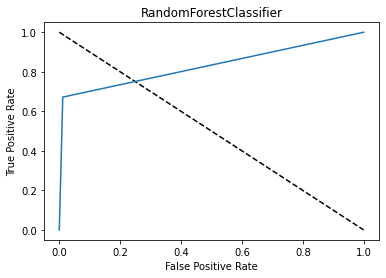

In [36]:
fpr,tpr,threshold=roc_curve(y_test,predrfc_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0], 'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RandomForestClassifier")
plt.show()
    

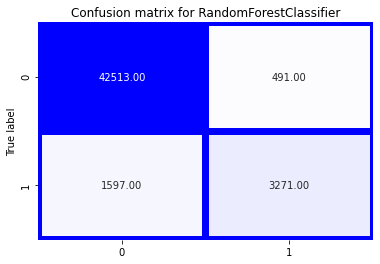

In [41]:
#Plotting confusion matrix 
cm=confusion_matrix(y_test,rfc.predict(X_test))
ax=plt.subplot()
sns.heatmap(cm,annot=True,cbar=False,ax=ax,linewidths=6,linecolor="b",center=0,fmt='.2f',cmap='bwr_r')
ax.set_label("Prediction");ax.set_ylabel("True label")
plt.title("Confusion matrix for RandomForestClassifier")
plt.show()


In [43]:
#Seeing the top feature which make the comment toxis our best model
import eli5

In [45]:
eli5.show_weights(rfc,vec=tf,top=15)

In [46]:
#Loding test data
df_test

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [49]:
#turning the test data intro vector
test=tf.fit_transform(df_test["comment_text"])

In [51]:
prediction=rfc.predict(test)

In [52]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
test_data=pd.DataFrame(prediction)

In [55]:
test_data

0
0       0
1       0
2       0
3       0
4       0
...    ..
153159  0
153160  1
153161  0
153162  0
153163  0

[153164 rows x 1 columns]

### Saving the best model

In [56]:
import joblib

In [57]:
model=joblib.dump(rfc,"malignant comments model.pkl")

In [58]:
model

['malignant comments model.pkl']